# Larbi SAIDCHIKH Classification note book 


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

%matplotlib inline

importing the data 

In [65]:
pd_hotels = pd.read_csv("first inten project.csv")  
pd_hotels.head()  

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [66]:
pd_hotels.shape

(36285, 17)

#### renaming columns

In [67]:
name_cols = {'number of adults':'Num_Adults',
            'number of children':  'Num_Children',
            'number of weekend nights': 'Num_Weekend_Nights',
            'number of week nights' : 'Num_Week_Nights',
            'type of meal': 'Meal_Type',
            'car parking space' : 'Car_Parking_Space' ,
            'room type' : 'Room_Type',
            'lead time' : 'Lead_Time',
            'market segment type' : 'Market_Segment_Type',
            'repeated' : 'Repeated',
            'average price ':'AVG_Price',
            'special requests':'Special_Requests',
            'date of reservation':'Reservation_Date',
            'booking status':'Booking_Status'}

pd_hotels.rename(columns=name_cols ,inplace=True)
pd_hotels.head()

,Booking_ID,Num_Adults,Num_Children,Num_Weekend_Nights,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,P-C,P-not-C,AVG_Price,Special_Requests,Reservation_Date,Booking_Status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### EDA and data cleaning 


In [68]:
pd_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Booking_ID           36285 non-null  object 
 1   Num_Adults           36285 non-null  int64  
 2   Num_Children         36285 non-null  int64  
 3   Num_Weekend_Nights   36285 non-null  int64  
 4   Num_Week_Nights      36285 non-null  int64  
 5   Meal_Type            36285 non-null  object 
 6   Car_Parking_Space    36285 non-null  int64  
 7   Room_Type            36285 non-null  object 
 8   Lead_Time            36285 non-null  int64  
 9   Market_Segment_Type  36285 non-null  object 
 10  Repeated             36285 non-null  int64  
 11  P-C                  36285 non-null  int64  
 12  P-not-C              36285 non-null  int64  
 13  AVG_Price            36285 non-null  float64
 14  Special_Requests     36285 non-null  int64  
 15  Reservation_Date     36285 non-null 

In [69]:
pd_hotels.describe()

,Num_Adults,Num_Children,Num_Weekend_Nights,Num_Week_Nights,Car_Parking_Space,Lead_Time,Repeated,P-C,P-not-C,AVG_Price,Special_Requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


checking for missing values 

In [70]:
pd_hotels.isna().sum()

Booking_ID             0
Num_Adults             0
Num_Children           0
Num_Weekend_Nights     0
Num_Week_Nights        0
Meal_Type              0
Car_Parking_Space      0
Room_Type              0
Lead_Time              0
Market_Segment_Type    0
Repeated               0
P-C                    0
P-not-C                0
AVG_Price              0
Special_Requests       0
Reservation_Date       0
Booking_Status         0
dtype: int64

checking for duplicates 


In [71]:
pd_hotels.duplicated().sum()

0

checking for unique values 


In [72]:
#checking for unique values 
pd_hotels.nunique()

Booking_ID             36285
Num_Adults                 5
Num_Children               6
Num_Weekend_Nights         8
Num_Week_Nights           18
Meal_Type                  4
Car_Parking_Space          2
Room_Type                  7
Lead_Time                352
Market_Segment_Type        5
Repeated                   2
P-C                        9
P-not-C                   59
AVG_Price               3930
Special_Requests           6
Reservation_Date         553
Booking_Status             2
dtype: int64

In [73]:
# list all the unique values of all the columns
for col in pd_hotels.columns:
    print( col, pd_hotels[col].unique())

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
Num_Adults [1 2 3 0 4]
Num_Children [ 1  0  2  3 10  9]
Num_Weekend_Nights [2 1 0 4 3 6 5 7]
Num_Week_Nights [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
Meal_Type ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Car_Parking_Space [0 1]
Room_Type ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Lead_Time [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 119  59  78 33

- dropping useless  columns


In [74]:
pd_hotels.drop(['Booking_ID'], axis=1, inplace=True)
pd_hotels

,Num_Adults,Num_Children,Num_Weekend_Nights,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,P-C,P-not-C,AVG_Price,Special_Requests,Reservation_Date,Booking_Status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


analysing the features one by one

In [75]:
pd_hotels['Num_Adults'].value_counts()

Num_Adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [76]:
pd_hotels['Num_Children'].value_counts()

Num_Children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

9 and 10 are not really useful here so we drop them but before we plot 

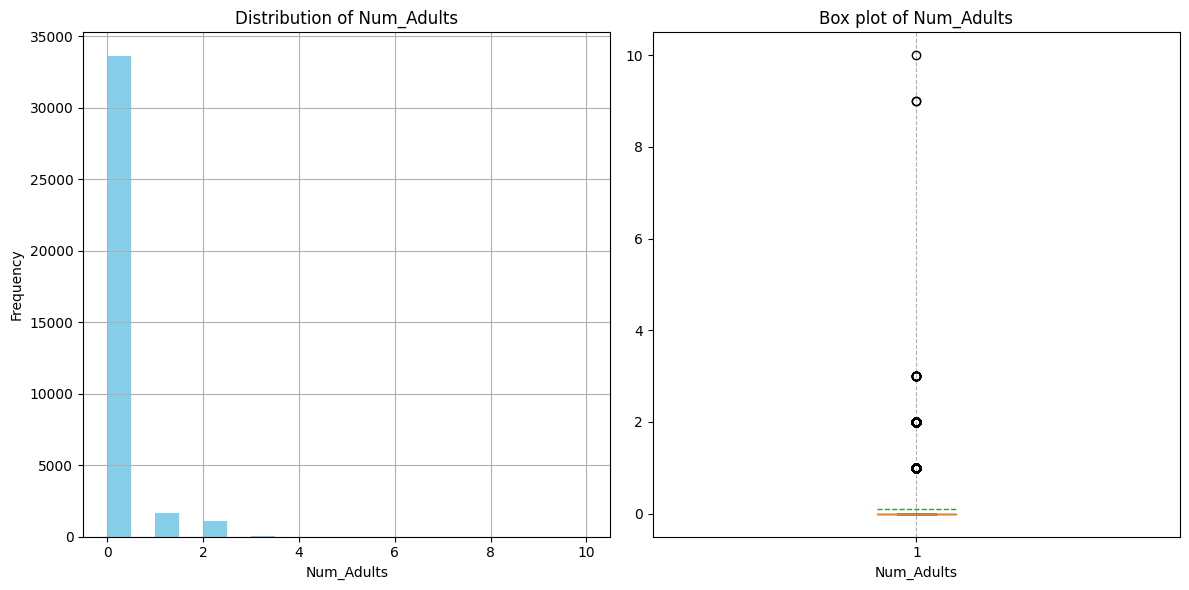

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

 # Plot histogram
axes[0].hist(pd_hotels['Num_Children'], bins=20, color='skyblue')
axes[0].set_title('Distribution of Num_Adults')
axes[0].set_xlabel('Num_Adults')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot box plot
axes[1].boxplot(pd_hotels['Num_Children'], vert=True, patch_artist=True, showfliers=True, meanline=True, showmeans=True, )
axes[1].set_title('Box plot of Num_Adults')
axes[1].set_xlabel('Num_Adults')
axes[1].grid(True, axis='x', linestyle='--', linewidth=0.8, )

plt.tight_layout()
plt.show()

- removing 10 and 9 entries

In [78]:
pd_hotels = pd_hotels[(pd_hotels['Num_Children'] != 10) & (pd_hotels['Num_Children'] != 9)]

In [79]:
pd_hotels['Num_Weekend_Nights'].value_counts()

Num_Weekend_Nights
0    16875
1    10000
2     9070
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [80]:
pd_hotels['Num_Week_Nights'].value_counts()

Num_Week_Nights
2     11446
1      9487
3      7842
4      2992
0      2387
5      1615
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Text(0.5, 1.0, 'Box plot of Num_Week_Nights')

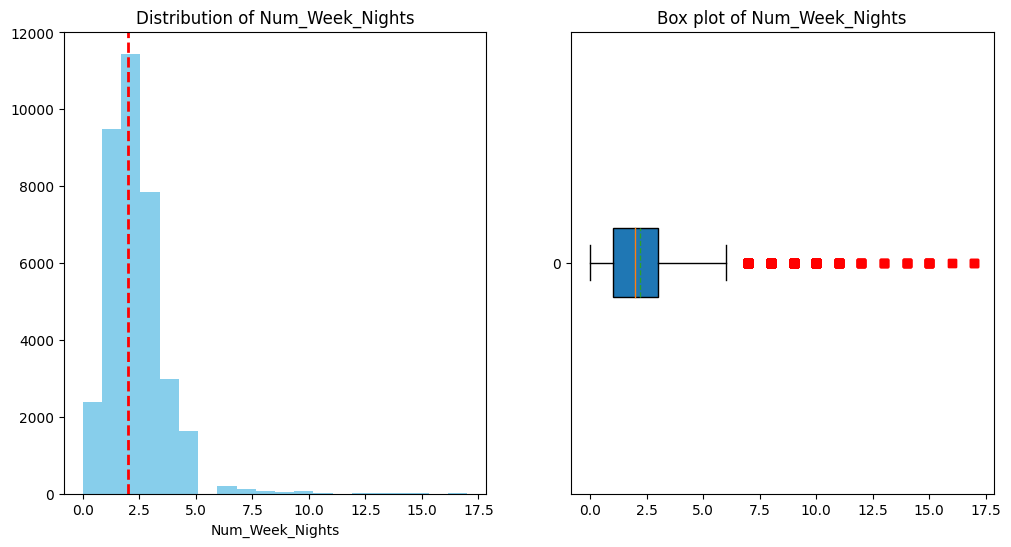

In [81]:
# plot histogram and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

 # Plot histogram on the left axis
axes[0].hist(pd_hotels['Num_Week_Nights'], bins=20, color='skyblue')
axes[0].set_title('Distribution of Num_Week_Nights')
axes[0].set_xlabel('Num_Week_Nights')

# Add a vertical line at median value
median_value = np.median(pd_hotels['Num_Week_Nights'])
vline = axes[0].axvline(x=median_value, linewidth=2, color='r', linestyle='--', label='Median')
# Set y-axis limit to include both sides of vline
axes[0].set_ylim(0)

# Plot boxplot on right axis
boxplot = pd.DataFrame({'Num_Week_Nights': pd_hotels['Num_Week_Nights']})
axes[1].boxplot(boxplot, positions=[0], sym='rs', vert=False, patch_artist=True, showfliers=True, meanline=True, showmeans=True)
axes[1].set_title('Box plot of Num_Week_Nights')



<Axes: xlabel='Num_Week_Nights', ylabel='count'>

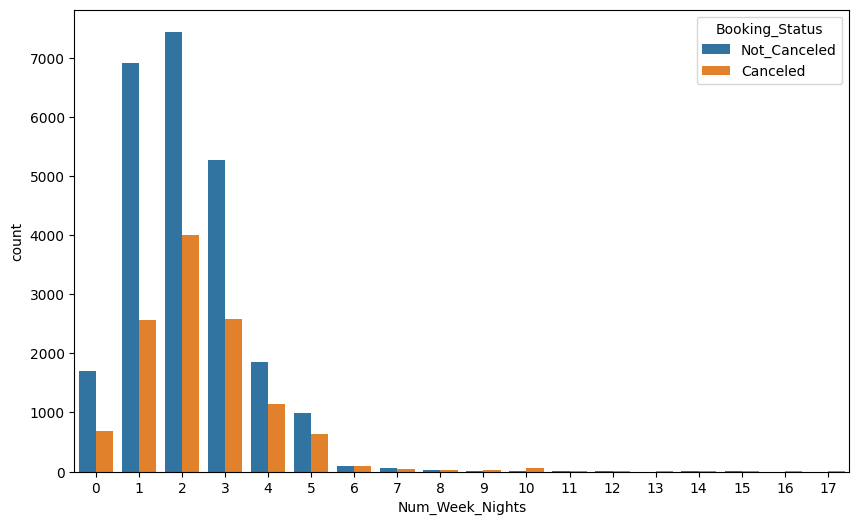

In [82]:
# plot bar chart of num_week_nights with booking_status
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Num_Week_Nights', hue='Booking_Status', data=pd_hotels, ax=ax)


In [83]:
# delete the rows with num_week_nights > 12
pd_hotels = pd_hotels[pd_hotels['Num_Week_Nights'] < 12]
pd_hotels['Num_Week_Nights'].value_counts()

Num_Week_Nights
2     11446
1      9487
3      7842
4      2992
0      2387
5      1615
6       189
7       113
10       62
8        62
9        34
11       17
Name: count, dtype: int64

In [84]:
pd_hotels['Meal_Type'].value_counts()

Meal_Type
Meal Plan 1     27815
Not Selected     5120
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

<Axes: xlabel='Meal_Type', ylabel='count'>

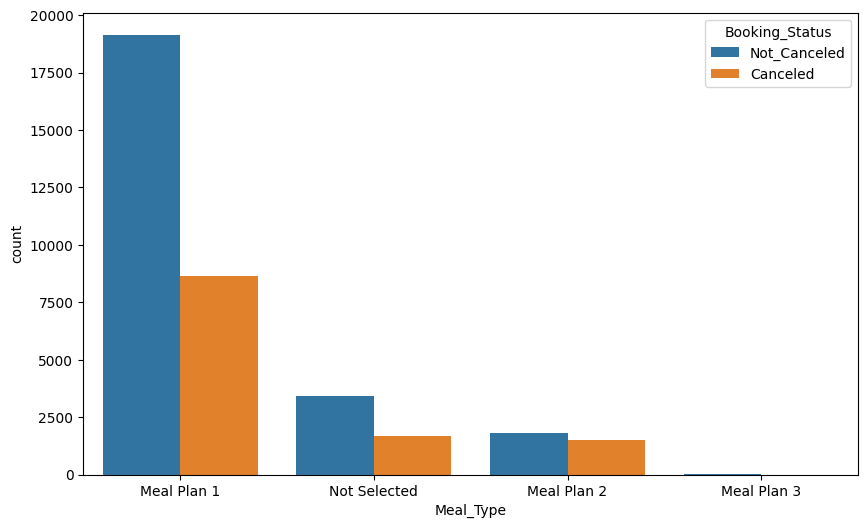

In [85]:
# plot bar chart of meal_type with booking_status
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Meal_Type', hue='Booking_Status', data=pd_hotels, ax=ax)


since meal plan 3 is proposed by the hotel it is not considered as an outlier 

In [86]:
pd_hotels['Car_Parking_Space'].value_counts()

Car_Parking_Space
0    35122
1     1124
Name: count, dtype: int64

<Axes: xlabel='Car_Parking_Space', ylabel='count'>

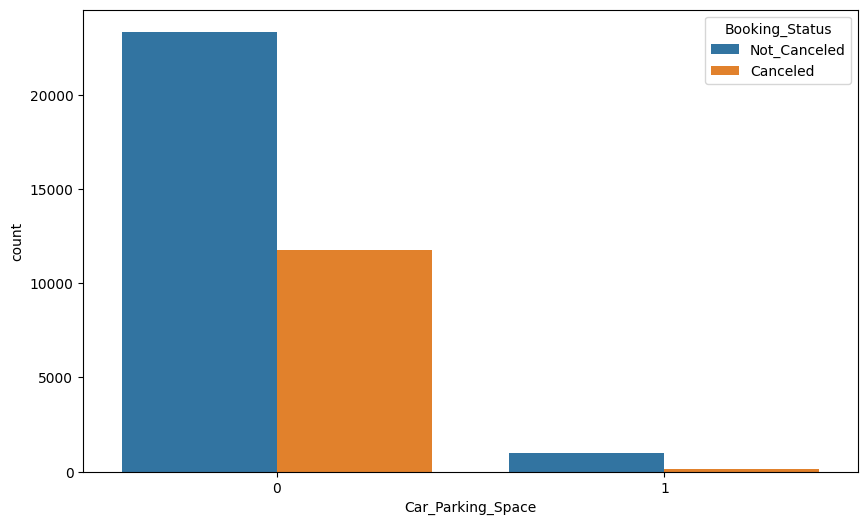

In [87]:
# plot bar chart of car_parking_space with booking_status
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Car_Parking_Space', hue='Booking_Status', data=pd_hotels, ax=ax)


In [88]:
pd_hotels['Market_Segment_Type'].value_counts()

Market_Segment_Type
Online           23188
Offline          10529
Corporate         2013
Complementary      391
Aviation           125
Name: count, dtype: int64

In [89]:
pd_hotels['Repeated'].value_counts()

Repeated
0    35316
1      930
Name: count, dtype: int64

In [90]:
pd_hotels['P-C'].value_counts()	

P-C
0     35908
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [91]:
pd_hotels['P-not-C'].value_counts()

P-not-C
0     35434
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

dropping the P-C and P-not-C columns because most of their entries are 0 

In [92]:
#drop the columns P-C and P-not-C
pd_hotels.drop(['P-C', 'P-not-C'], axis=1, inplace=True)
pd_hotels.head()

,Num_Adults,Num_Children,Num_Weekend_Nights,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,AVG_Price,Special_Requests,Reservation_Date,Booking_Status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,4/11/2018,Canceled


In [93]:
pd_hotels['Special_Requests'].value_counts()

Special_Requests
0    19758
1    11363
2     4363
3      676
4       78
5        8
Name: count, dtype: int64

### Dealing with categorical data


In [94]:
#convert Booking status into binary 
pd_hotels['Booking_Status'] = pd_hotels['Booking_Status'].map({'Not_Canceled': 1, 'Canceled': 0, })


In [95]:
#Convert date into int
pd_hotels['Reservation_Date'] = pd.to_datetime(pd_hotels['Reservation_Date'], errors='coerce').astype(np.int64)

In [96]:
#Encoding the categorical data columns
label_encoder = LabelEncoder()
pd_hotels['Meal_Type'] = label_encoder.fit_transform(pd_hotels['Meal_Type'])
pd_hotels['Room_Type'] = label_encoder.fit_transform(pd_hotels['Room_Type'])
pd_hotels['Market_Segment_Type'] = label_encoder.fit_transform(pd_hotels['Market_Segment_Type'])


In [97]:
pd_hotels.info()
pd_hotels.head()

<class 'pandas.core.frame.DataFrame'>
Index: 36246 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Num_Adults           36246 non-null  int64  
 1   Num_Children         36246 non-null  int64  
 2   Num_Weekend_Nights   36246 non-null  int64  
 3   Num_Week_Nights      36246 non-null  int64  
 4   Meal_Type            36246 non-null  int32  
 5   Car_Parking_Space    36246 non-null  int64  
 6   Room_Type            36246 non-null  int32  
 7   Lead_Time            36246 non-null  int64  
 8   Market_Segment_Type  36246 non-null  int32  
 9   Repeated             36246 non-null  int64  
 10  AVG_Price            36246 non-null  float64
 11  Special_Requests     36246 non-null  int64  
 12  Reservation_Date     36246 non-null  int64  
 13  Booking_Status       36246 non-null  int64  
dtypes: float64(1), int32(3), int64(10)
memory usage: 3.7 MB


,Num_Adults,Num_Children,Num_Weekend_Nights,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,AVG_Price,Special_Requests,Reservation_Date,Booking_Status
0,1,1,2,5,0,0,0,224,3,0,88.00,0,1443744000000000000,1
1,1,0,1,3,3,0,0,5,4,0,106.68,1,1541462400000000000,1
2,2,1,1,3,0,0,0,1,4,0,50.00,0,1519776000000000000,0
3,1,0,0,2,0,0,0,211,4,0,100.00,1,1495238400000000000,0
4,1,0,1,2,3,0,0,48,4,0,77.00,0,1523404800000000000,0


### correlation 

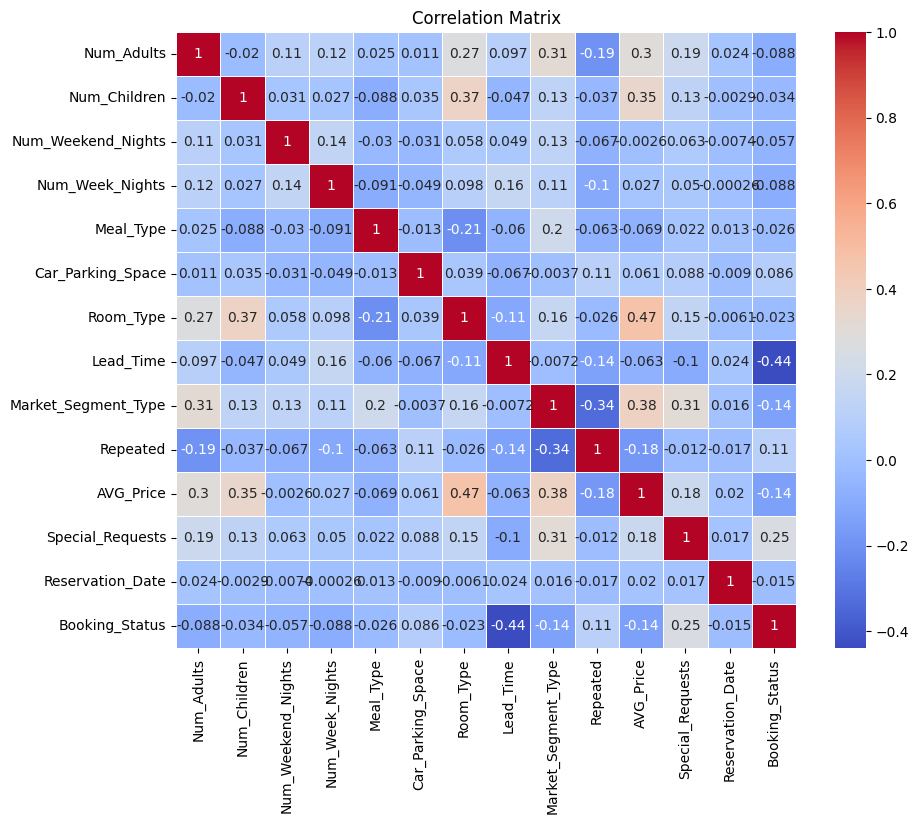

In [98]:
#correlation matrix
correlation = pd_hotels.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [99]:
#drop the columns that are not correlated with the target variable
pd_hotels.drop(['Num_Weekend_Nights', 'Reservation_Date'], axis=1, inplace=True)


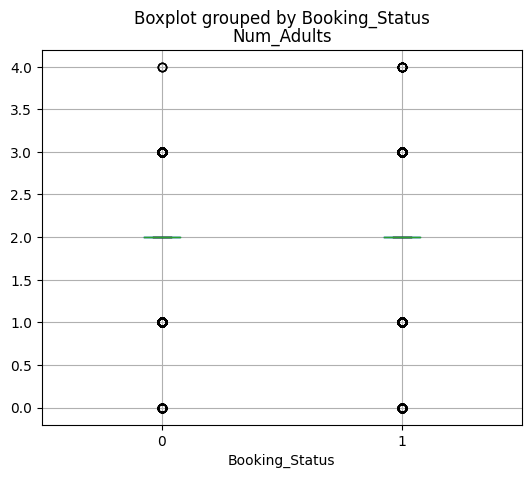

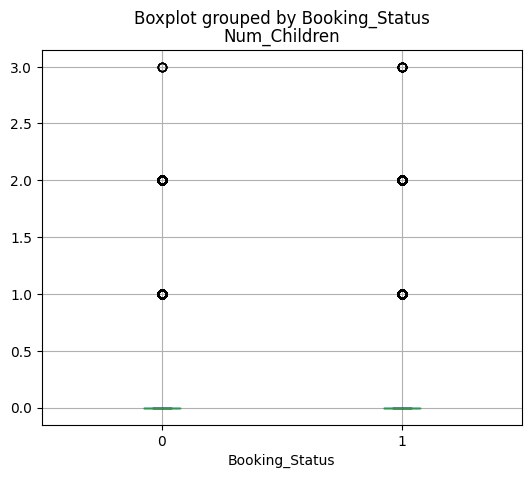

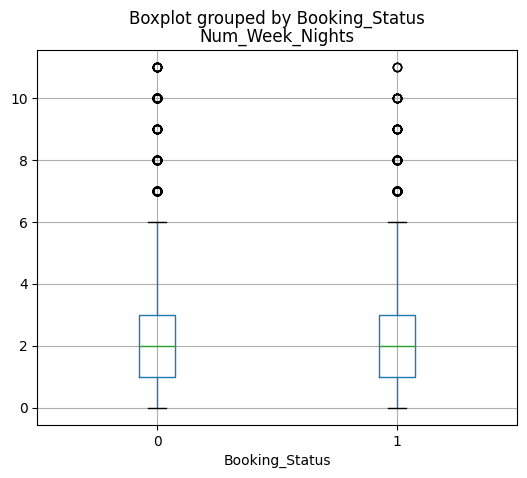

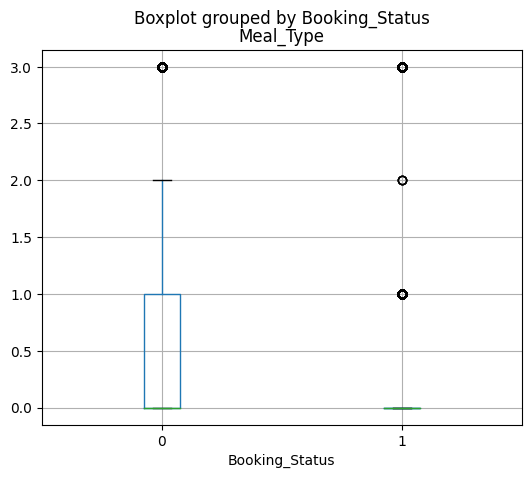

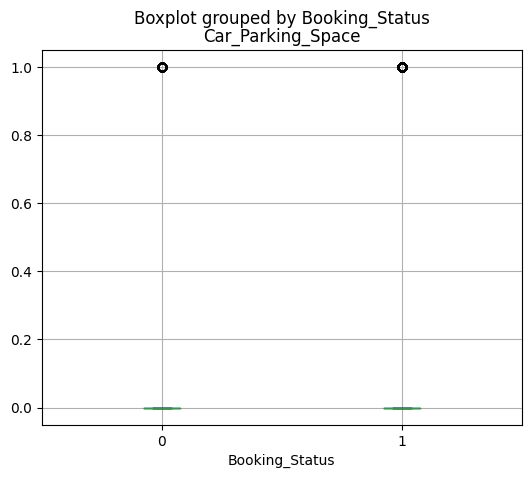

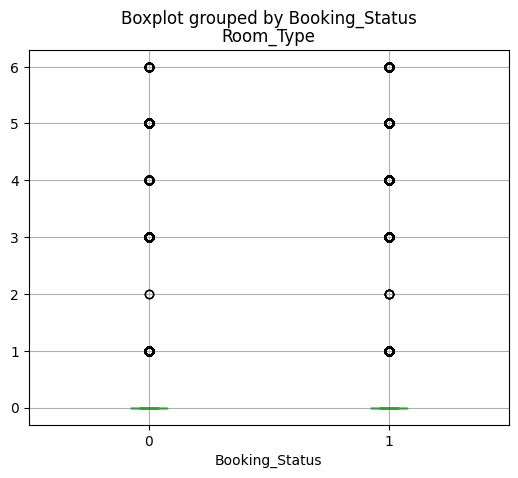

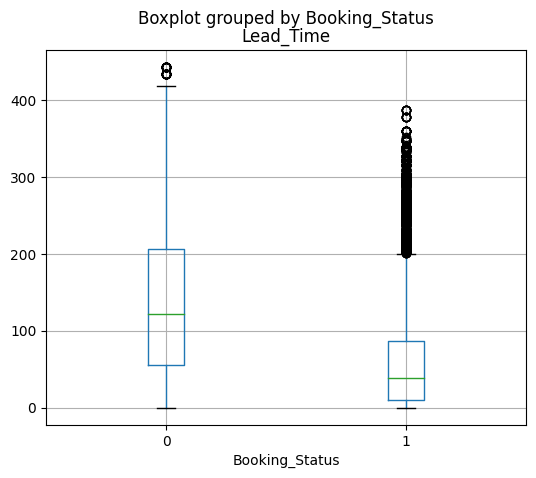

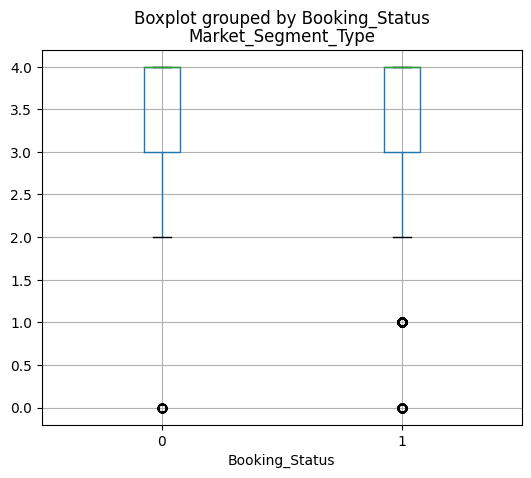

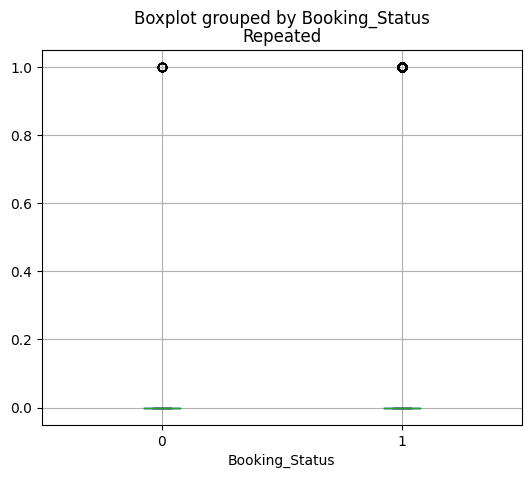

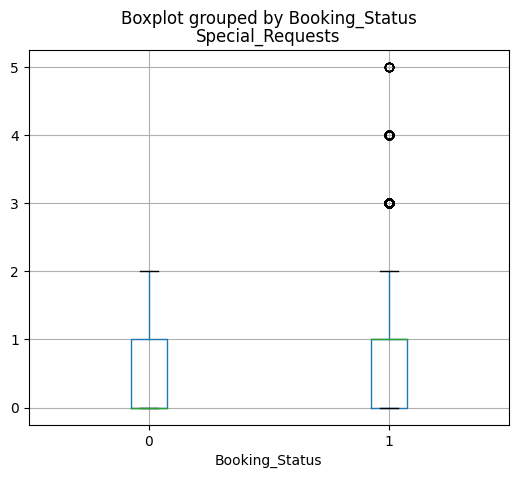

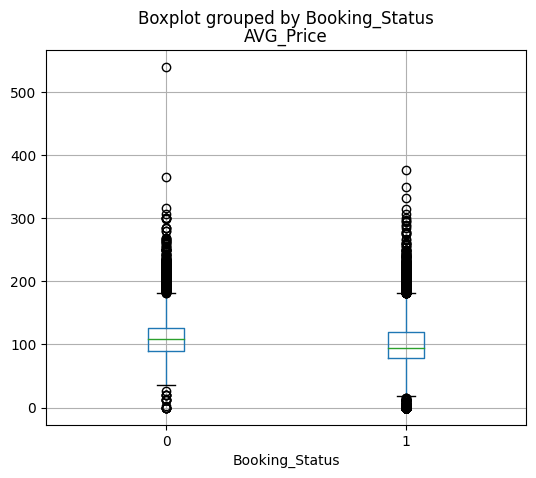

In [100]:
# Defining the features to visualize
features = ['Num_Adults', 'Num_Children', 'Num_Week_Nights', 'Meal_Type', 'Car_Parking_Space', 'Room_Type', 'Lead_Time', 'Market_Segment_Type', 'Repeated', 'Special_Requests', 'AVG_Price']

# Visualize using the boxplot method of matplotlib, sorted by the label values
for col in features:
    pd_hotels.boxplot(column=col, by= 'Booking_Status', figsize=(6,5))
    plt.title(col)  
plt.show()


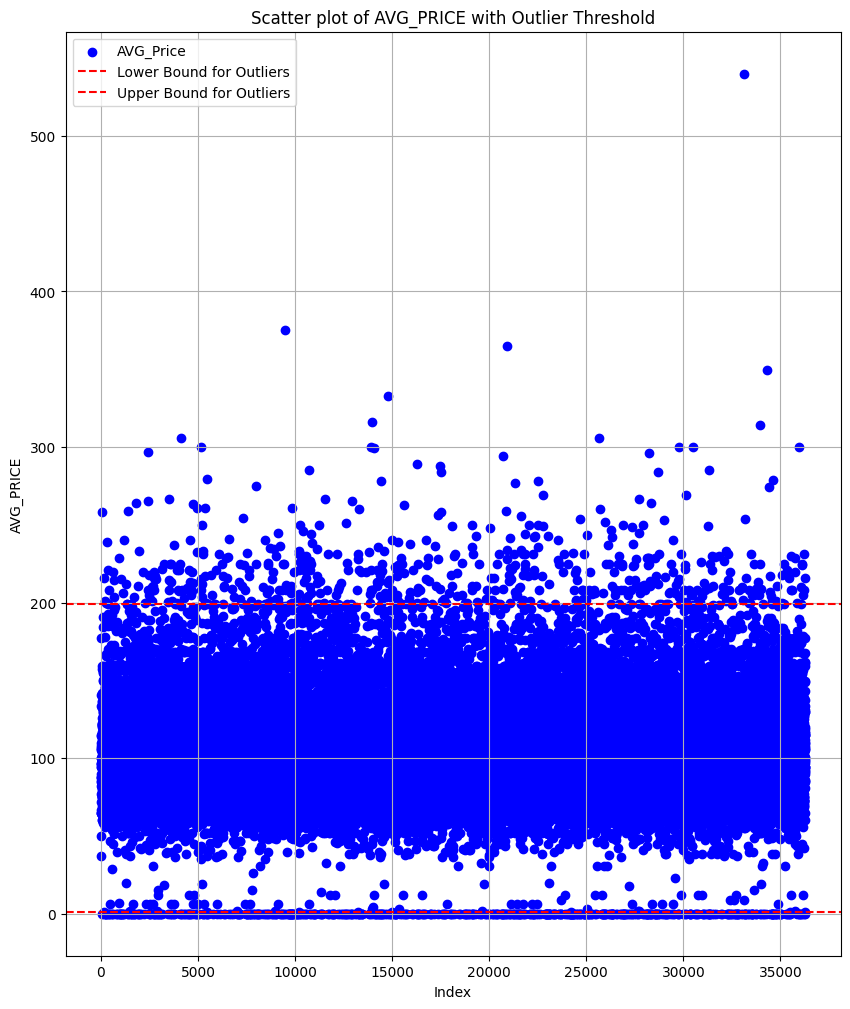

In [101]:
# Set the threshold for outliers (you can adjust this value as needed)
outlier_threshold = 2
    
# Calculate the boundaries for outliers
Q1 = pd_hotels['AVG_Price'].quantile(0.25)
Q3 = pd_hotels['AVG_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR
    
# Create a scatter plot of AVG_PRICE
plt.figure(figsize=(10, 12))
plt.scatter(pd_hotels.index, pd_hotels['AVG_Price'], color='blue', label='AVG_Price')
    
# Plot a horizontal line indicating the threshold for outliers
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound for Outliers')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound for Outliers')
    
plt.title('Scatter plot of AVG_PRICE with Outlier Threshold')
plt.xlabel('Index')
plt.ylabel('AVG_PRICE')
plt.legend()
plt.grid(True)
plt.show()



In [102]:
# Create a new dataframe without the outliers
pd_hotels = pd_hotels[(pd_hotels['AVG_Price'] > lower_bound) & (pd_hotels['AVG_Price'] < upper_bound)]
print('\nAfter removing outliers:\n', pd_hotels.head())


After removing outliers:
    Num_Adults  Num_Children  Num_Week_Nights  Meal_Type  Car_Parking_Space  \
0           1             1                5          0                  0   
1           1             0                3          3                  0   
2           2             1                3          0                  0   
3           1             0                2          0                  0   
4           1             0                2          3                  0   

   Room_Type  Lead_Time  Market_Segment_Type  Repeated  AVG_Price  \
0          0        224                    3         0      88.00   
1          0          5                    4         0     106.68   
2          0          1                    4         0      50.00   
3          0        211                    4         0     100.00   
4          0         48                    4         0      77.00   

   Special_Requests  Booking_Status  
0                 0               1  
1            

### SCALING THE DATA

In [103]:
# Normalize the numeric features so they're on approximately the same scale
scaler = MinMaxScaler()
pd_hotels[['Num_Adults', 'Num_Children', 'Num_Week_Nights', 'Meal_Type', 'Car_Parking_Space', 'Room_Type', 'Lead_Time', 'Market_Segment_Type', 'Repeated', 'Special_Requests', 'AVG_Price']] = scaler.fit_transform(pd_hotels[['Num_Adults', 'Num_Children', 'Num_Week_Nights', 'Meal_Type', 'Car_Parking_Space', 'Room_Type', 'Lead_Time', 'Market_Segment_Type', 'Repeated', 'Special_Requests', 'AVG_Price']])
pd_hotels.head()

,Num_Adults,Num_Children,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,AVG_Price,Special_Requests,Booking_Status
0,0.25,0.333333,0.454545,0.0,0.0,0.0,0.505643,0.75,0.0,0.438663,0.0,1
1,0.25,0.000000,0.272727,1.0,0.0,0.0,0.011287,1.00,0.0,0.532849,0.2,1
2,0.50,0.333333,0.272727,0.0,0.0,0.0,0.002257,1.00,0.0,0.247063,0.0,0
3,0.25,0.000000,0.181818,0.0,0.0,0.0,0.476298,1.00,0.0,0.499168,0.2,0
4,0.25,0.000000,0.181818,1.0,0.0,0.0,0.108352,1.00,0.0,0.383200,0.0,0


In [104]:
#final data shape
pd_hotels.shape

(35179, 12)

In [105]:
#

## Splitting the data 

In [106]:
#save the cleaned data
pd_hotels.to_csv('cleaned_data.csv', index=False)


In [107]:
#split the data into train and test
X = pd_hotels.drop('Booking_Status', axis=1)
y = pd_hotels['Booking_Status']


In [127]:
X

,Num_Adults,Num_Children,Num_Week_Nights,Meal_Type,Car_Parking_Space,Room_Type,Lead_Time,Market_Segment_Type,Repeated,AVG_Price,Special_Requests
0,0.25,0.333333,0.454545,0.000000,0.0,0.0,0.505643,0.75,0.0,0.438663,0.0
1,0.25,0.000000,0.272727,1.000000,0.0,0.0,0.011287,1.00,0.0,0.532849,0.2
2,0.50,0.333333,0.272727,0.000000,0.0,0.0,0.002257,1.00,0.0,0.247063,0.0
3,0.25,0.000000,0.181818,0.000000,0.0,0.0,0.476298,1.00,0.0,0.499168,0.2
4,0.25,0.000000,0.181818,1.000000,0.0,0.0,0.108352,1.00,0.0,0.383200,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36280,0.50,0.000000,0.181818,0.333333,0.0,0.0,0.781038,1.00,0.0,0.574800,0.2
36281,0.50,0.000000,0.272727,0.000000,0.0,0.0,0.076749,1.00,0.0,0.537236,0.2
36282,0.50,0.000000,0.272727,0.000000,0.0,0.5,0.187359,1.00,0.0,0.527454,0.2
36283,0.75,0.000000,0.363636,0.000000,0.0,0.0,0.273138,0.75,0.0,0.483538,0.2


In [129]:
#selecting the best features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)
X_new2 = pd.DataFrame(X_new)
X_new.shape
X_new 
X_new2

,0,1,2,3,4,5,6,7,8,9
0,0.25,0.454545,0.000000,0.0,0.0,0.505643,0.75,0.0,0.438663,0.0
1,0.25,0.272727,1.000000,0.0,0.0,0.011287,1.00,0.0,0.532849,0.2
2,0.50,0.272727,0.000000,0.0,0.0,0.002257,1.00,0.0,0.247063,0.0
3,0.25,0.181818,0.000000,0.0,0.0,0.476298,1.00,0.0,0.499168,0.2
4,0.25,0.181818,1.000000,0.0,0.0,0.108352,1.00,0.0,0.383200,0.0
...,...,...,...,...,...,...,...,...,...,...
35174,0.50,0.181818,0.333333,0.0,0.0,0.781038,1.00,0.0,0.574800,0.2
35175,0.50,0.272727,0.000000,0.0,0.0,0.076749,1.00,0.0,0.537236,0.2
35176,0.50,0.272727,0.000000,0.0,0.5,0.187359,1.00,0.0,0.527454,0.2
35177,0.75,0.363636,0.000000,0.0,0.0,0.273138,0.75,0.0,0.483538,0.2


In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28143, 10)
y_train shape: (28143,)
X_test shape: (7036, 10)
y_test shape: (7036,)


# MODEL BUILDING AND EVALUATION

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [111]:
# Create a function to evaluate the model (accuracy, precision, recall, f1-score)
def evaluate_model(model, actual, prediction):
    print('Accuracy:', accuracy_score(actual, prediction))
    print('Confusion Matrix:\n', confusion_matrix(actual, prediction))
    print('Classification Report:\n', classification_report(actual, prediction))

### **Logistic Regression model**

In [112]:
# fit the model 
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


In [113]:
# Evaluate the model
print('Logistic Regression Model')
evaluate_model(log_reg, y_test, y_pred_lr)

# put the results in a dataframe (for comparison with other models)
results = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [accuracy_score(y_test, y_pred_lr)]})
results

Logistic Regression Model
Accuracy: 0.7906480955088119
Confusion Matrix:
 [[1357  951]
 [ 522 4206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65      2308
           1       0.82      0.89      0.85      4728

    accuracy                           0.79      7036
   macro avg       0.77      0.74      0.75      7036
weighted avg       0.78      0.79      0.78      7036



,Model,Accuracy
0,Logistic Regression,0.790648


### **KNN**

In [114]:
# KNN 
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [115]:
# Evaluate the model
print('KNN Model')
evaluate_model(knn, y_test, y_pred_knn)

# Add the results to the dataframe
# Create a new row as a dictionary
new_row = {'Model': 'KNN', 'Accuracy': accuracy_score(y_test, y_pred_knn)}

# Convert the new row to a DataFrame
new_df = pd.DataFrame([new_row])

# Concatenate the existing DataFrame with the new DataFrame
results = pd.concat([results, new_df], ignore_index=True)
results


KNN Model
Accuracy: 0.8548891415577032
Confusion Matrix:
 [[1713  595]
 [ 426 4302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      2308
           1       0.88      0.91      0.89      4728

    accuracy                           0.85      7036
   macro avg       0.84      0.83      0.83      7036
weighted avg       0.85      0.85      0.85      7036



,Model,Accuracy
0,Logistic Regression,0.790648
1,KNN,0.854889


## **SVM**

In [116]:
# SVM
# Create a SVM classifier
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [117]:
# evaluate the model
print('SVM Model')
evaluate_model(svm_model, y_test, y_pred_svm)

# Add the results to the dataframe
# Create a new row as a dictionary
new_row = {'Model': 'SVM', 'Accuracy': accuracy_score(y_test, y_pred_svm)}

# Convert the new row to a DataFrame
new_df = pd.DataFrame([new_row])

# Concatenate the existing DataFrame with the new DataFrame
results = pd.concat([results, new_df], ignore_index=True)
results


SVM Model
Accuracy: 0.8153780557134735
Confusion Matrix:
 [[1343  965]
 [ 334 4394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.58      0.67      2308
           1       0.82      0.93      0.87      4728

    accuracy                           0.82      7036
   macro avg       0.81      0.76      0.77      7036
weighted avg       0.81      0.82      0.81      7036



,Model,Accuracy
0,Logistic Regression,0.790648
1,KNN,0.854889
2,SVM,0.815378


## **Decision trees**

In [118]:
# Decision Tree
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [119]:
# Evaluate the model
print('Decision Tree Model')
evaluate_model(dt, y_test, y_pred_dt)

# Add the results to the dataframe
# Create a new row as a dictionary
new_row = {'Model': 'Decision Tree', 'Accuracy': accuracy_score(y_test, y_pred_dt)}

# Convert the new row to a DataFrame
new_df = pd.DataFrame([new_row])

# Concatenate the existing DataFrame with the new DataFrame
results = pd.concat([results, new_df], ignore_index=True)
results

Decision Tree Model
Accuracy: 0.8307276861853325
Confusion Matrix:
 [[1618  690]
 [ 501 4227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      2308
           1       0.86      0.89      0.88      4728

    accuracy                           0.83      7036
   macro avg       0.81      0.80      0.80      7036
weighted avg       0.83      0.83      0.83      7036



,Model,Accuracy
0,Logistic Regression,0.790648
1,KNN,0.854889
2,SVM,0.815378
3,Decision Tree,0.830728


### **Random Forest Classifier**

In [120]:
# Random Forest
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [121]:
# Evaluate the model
print('Random Forest Model')
evaluate_model(rf, y_test, y_pred_rf)

# Add the results to the dataframe
# Create a new row as a dictionary
new_row = {'Model': 'Random Forest', 'Accuracy': accuracy_score(y_test, y_pred_rf)}

# Convert the new row to a DataFrame
new_df = pd.DataFrame([new_row])

# Concatenate the existing DataFrame with the new DataFrame
results = pd.concat([results, new_df], ignore_index=True)
results

Random Forest Model
Accuracy: 0.879619101762365
Confusion Matrix:
 [[1804  504]
 [ 343 4385]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2308
           1       0.90      0.93      0.91      4728

    accuracy                           0.88      7036
   macro avg       0.87      0.85      0.86      7036
weighted avg       0.88      0.88      0.88      7036



,Model,Accuracy
0,Logistic Regression,0.790648
1,KNN,0.854889
2,SVM,0.815378
3,Decision Tree,0.830728
4,Random Forest,0.879619


### **XGBoost**

In [122]:
# XGBoost
# Create a XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [123]:
# Evaluate the model
print('XGBoost Model')
evaluate_model(xgb, y_test, y_pred_xgb)

# Add the results to the dataframe
# Create a new row as a dictionary
new_row = {'Model': 'XGBoost', 'Accuracy': accuracy_score(y_test, y_pred_xgb)}

# Convert the new row to a DataFrame
new_df = pd.DataFrame([new_row])

# Concatenate the existing DataFrame with the new DataFrame
results = pd.concat([results, new_df], ignore_index=True)
results

XGBoost Model
Accuracy: 0.875355315520182
Confusion Matrix:
 [[1759  549]
 [ 328 4400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      2308
           1       0.89      0.93      0.91      4728

    accuracy                           0.88      7036
   macro avg       0.87      0.85      0.85      7036
weighted avg       0.87      0.88      0.87      7036



,Model,Accuracy
0,Logistic Regression,0.790648
1,KNN,0.854889
2,SVM,0.815378
3,Decision Tree,0.830728
4,Random Forest,0.879619
5,XGBoost,0.875355


## Saving the best model for deployement 

In [124]:
# save the best model 
import joblib
joblib.dump(rf, 'best_model.pkl')


['best_model.pkl']

In [131]:
# select first sample of X_test is a numpy array
X_test[0]


array([0.25      , 0.27272727, 0.        , 0.        , 0.        ,
       0.32957111, 0.75      , 0.        , 0.3226945 , 0.        ])